In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import re

In [ ]:
text = open('access_log_Jul95.txt', 'r')

In [ ]:
lines = text.readlines()

In [ ]:
lines

['199.72.81.55 - - [01/Jul/1995:00:00:01 -0400] "GET /history/apollo/ HTTP/1.0" 200 6245\n',
 'unicomp6.unicomp.net - - [01/Jul/1995:00:00:06 -0400] "GET /shuttle/countdown/ HTTP/1.0" 200 3985\n',
 '199.120.110.21 - - [01/Jul/1995:00:00:09 -0400] "GET /shuttle/missions/sts-73/mission-sts-73.html HTTP/1.0" 200 4085\n',
 'burger.letters.com - - [01/Jul/1995:00:00:11 -0400] "GET /shuttle/countdown/liftoff.html HTTP/1.0" 304 0\n',
 '199.120.110.21 - - [01/Jul/1995:00:00:11 -0400] "GET /shuttle/missions/sts-73/sts-73-patch-small.gif HTTP/1.0" 200 4179\n',
 'burger.letters.com - - [01/Jul/1995:00:00:12 -0400] "GET /images/NASA-logosmall.gif HTTP/1.0" 304 0\n',
 'burger.letters.com - - [01/Jul/1995:00:00:12 -0400] "GET /shuttle/countdown/video/livevideo.gif HTTP/1.0" 200 0\n',
 '205.212.115.106 - - [01/Jul/1995:00:00:12 -0400] "GET /shuttle/countdown/countdown.html HTTP/1.0" 200 3985\n',
 'd104.aa.net - - [01/Jul/1995:00:00:13 -0400] "GET /shuttle/countdown/ HTTP/1.0" 200 3985\n',
 '129.94.14

In [ ]:
text.close()

In [ ]:
for index,line in enumerate(lines):
  lines[index] = line.strip()

In [ ]:
df = pd.read_csv('access_log_Jul95.txt', sep=' ', names = ['host','-', 'time' , 'request_type_url', 'reponse', 'size'])
df

,,host,-,time,request_type_url,reponse,size
199.72.81.55,-,-,[01/Jul/1995:00:00:01,-0400],GET /history/apollo/ HTTP/1.0,200,6245
unicomp6.unicomp.net,-,-,[01/Jul/1995:00:00:06,-0400],GET /shuttle/countdown/ HTTP/1.0,200,3985
199.120.110.21,-,-,[01/Jul/1995:00:00:09,-0400],GET /shuttle/missions/sts-73/mission-sts-73.ht...,200,4085
burger.letters.com,-,-,[01/Jul/1995:00:00:11,-0400],GET /shuttle/countdown/liftoff.html HTTP/1.0,304,0
199.120.110.21,-,-,[01/Jul/1995:00:00:11,-0400],GET /shuttle/missions/sts-73/sts-73-patch-smal...,200,4179
...,...,...,...,...,...,...,...
ix-tam3-07.ix.netcom.com,-,-,[02/Jul/1995:13:40:05,-0400],GET /icons/blank.xbm HTTP/1.0,200,509
csd1-9.infolink.net,-,-,[02/Jul/1995:13:40:06,-0400],GET /procurement/business/kscbus.htm HTTP/1.0,200,1293
port49.iprolink.ch,-,-,[02/Jul/1995:13:40:07,-0400],GET /shuttle/missions/sts-71/sts-71-day-06-hig...,200,6136
che2.llnl.gov,-,-,[02/Jul/1995:13:40:07,-0400],GET /shuttle/missions/sts-7/images/ HTTP/1.0,200,1313


In [ ]:
df1 = df.reset_index()

In [ ]:
df1

,level_0,level_1,host,-,time,request_type_url,reponse,size
0,199.72.81.55,-,-,[01/Jul/1995:00:00:01,-0400],GET /history/apollo/ HTTP/1.0,200,6245
1,unicomp6.unicomp.net,-,-,[01/Jul/1995:00:00:06,-0400],GET /shuttle/countdown/ HTTP/1.0,200,3985
2,199.120.110.21,-,-,[01/Jul/1995:00:00:09,-0400],GET /shuttle/missions/sts-73/mission-sts-73.ht...,200,4085
3,burger.letters.com,-,-,[01/Jul/1995:00:00:11,-0400],GET /shuttle/countdown/liftoff.html HTTP/1.0,304,0
4,199.120.110.21,-,-,[01/Jul/1995:00:00:11,-0400],GET /shuttle/missions/sts-73/sts-73-patch-smal...,200,4179
...,...,...,...,...,...,...,...,...
91709,ix-tam3-07.ix.netcom.com,-,-,[02/Jul/1995:13:40:05,-0400],GET /icons/blank.xbm HTTP/1.0,200,509
91710,csd1-9.infolink.net,-,-,[02/Jul/1995:13:40:06,-0400],GET /procurement/business/kscbus.htm HTTP/1.0,200,1293
91711,port49.iprolink.ch,-,-,[02/Jul/1995:13:40:07,-0400],GET /shuttle/missions/sts-71/sts-71-day-06-hig...,200,6136
91712,che2.llnl.gov,-,-,[02/Jul/1995:13:40:07,-0400],GET /shuttle/missions/sts-7/images/ HTTP/1.0,200,1313


In [ ]:
df1['host1'] = df1['level_0']

In [ ]:
df1

,level_0,level_1,host,-,time,request_type_url,reponse,size,host1
0,199.72.81.55,-,-,[01/Jul/1995:00:00:01,-0400],GET /history/apollo/ HTTP/1.0,200,6245,199.72.81.55
1,unicomp6.unicomp.net,-,-,[01/Jul/1995:00:00:06,-0400],GET /shuttle/countdown/ HTTP/1.0,200,3985,unicomp6.unicomp.net
2,199.120.110.21,-,-,[01/Jul/1995:00:00:09,-0400],GET /shuttle/missions/sts-73/mission-sts-73.ht...,200,4085,199.120.110.21
3,burger.letters.com,-,-,[01/Jul/1995:00:00:11,-0400],GET /shuttle/countdown/liftoff.html HTTP/1.0,304,0,burger.letters.com
4,199.120.110.21,-,-,[01/Jul/1995:00:00:11,-0400],GET /shuttle/missions/sts-73/sts-73-patch-smal...,200,4179,199.120.110.21
...,...,...,...,...,...,...,...,...,...
91709,ix-tam3-07.ix.netcom.com,-,-,[02/Jul/1995:13:40:05,-0400],GET /icons/blank.xbm HTTP/1.0,200,509,ix-tam3-07.ix.netcom.com
91710,csd1-9.infolink.net,-,-,[02/Jul/1995:13:40:06,-0400],GET /procurement/business/kscbus.htm HTTP/1.0,200,1293,csd1-9.infolink.net
91711,port49.iprolink.ch,-,-,[02/Jul/1995:13:40:07,-0400],GET /shuttle/missions/sts-71/sts-71-day-06-hig...,200,6136,port49.iprolink.ch
91712,che2.llnl.gov,-,-,[02/Jul/1995:13:40:07,-0400],GET /shuttle/missions/sts-7/images/ HTTP/1.0,200,1313,che2.llnl.gov


In [ ]:
#removing the columns names level_0, level_1, host, time since they are not required
df1.drop(columns = ['level_0', 'level_1', 'host', 'time'])

,-,request_type_url,reponse,size,host1
0,[01/Jul/1995:00:00:01,GET /history/apollo/ HTTP/1.0,200,6245,199.72.81.55
1,[01/Jul/1995:00:00:06,GET /shuttle/countdown/ HTTP/1.0,200,3985,unicomp6.unicomp.net
2,[01/Jul/1995:00:00:09,GET /shuttle/missions/sts-73/mission-sts-73.ht...,200,4085,199.120.110.21
3,[01/Jul/1995:00:00:11,GET /shuttle/countdown/liftoff.html HTTP/1.0,304,0,burger.letters.com
4,[01/Jul/1995:00:00:11,GET /shuttle/missions/sts-73/sts-73-patch-smal...,200,4179,199.120.110.21
...,...,...,...,...,...
91709,[02/Jul/1995:13:40:05,GET /icons/blank.xbm HTTP/1.0,200,509,ix-tam3-07.ix.netcom.com
91710,[02/Jul/1995:13:40:06,GET /procurement/business/kscbus.htm HTTP/1.0,200,1293,csd1-9.infolink.net
91711,[02/Jul/1995:13:40:07,GET /shuttle/missions/sts-71/sts-71-day-06-hig...,200,6136,port49.iprolink.ch
91712,[02/Jul/1995:13:40:07,GET /shuttle/missions/sts-7/images/ HTTP/1.0,200,1313,che2.llnl.gov


In [ ]:
df1 = df1[['host1', '-', 'request_type_url', 'reponse', 'size']]

In [ ]:
df1

,host1,-,request_type_url,reponse,size
0,199.72.81.55,[01/Jul/1995:00:00:01,GET /history/apollo/ HTTP/1.0,200,6245
1,unicomp6.unicomp.net,[01/Jul/1995:00:00:06,GET /shuttle/countdown/ HTTP/1.0,200,3985
2,199.120.110.21,[01/Jul/1995:00:00:09,GET /shuttle/missions/sts-73/mission-sts-73.ht...,200,4085
3,burger.letters.com,[01/Jul/1995:00:00:11,GET /shuttle/countdown/liftoff.html HTTP/1.0,304,0
4,199.120.110.21,[01/Jul/1995:00:00:11,GET /shuttle/missions/sts-73/sts-73-patch-smal...,200,4179
...,...,...,...,...,...
91709,ix-tam3-07.ix.netcom.com,[02/Jul/1995:13:40:05,GET /icons/blank.xbm HTTP/1.0,200,509
91710,csd1-9.infolink.net,[02/Jul/1995:13:40:06,GET /procurement/business/kscbus.htm HTTP/1.0,200,1293
91711,port49.iprolink.ch,[02/Jul/1995:13:40:07,GET /shuttle/missions/sts-71/sts-71-day-06-hig...,200,6136
91712,che2.llnl.gov,[02/Jul/1995:13:40:07,GET /shuttle/missions/sts-7/images/ HTTP/1.0,200,1313


In [ ]:
#renaming of columns so that they represent the actual field values and to correct spelling errors
df1 = df1.rename(columns = {'host1':'host', '-': 'time', 'reponse': 'response'})

In [ ]:
#creating a function for getting the request type from each row of request_type_url column using findall method
def get_request(row):
  pattern = '([A-Za-z0-9]+)'
  request = re.findall(pattern, row)
  return request[0]
df1['request_type'] = df1['request_type_url'].apply(get_request)

In [ ]:
df1

,host,time,request_type_url,response,size,request_type
0,199.72.81.55,[01/Jul/1995:00:00:01,GET /history/apollo/ HTTP/1.0,200,6245,GET
1,unicomp6.unicomp.net,[01/Jul/1995:00:00:06,GET /shuttle/countdown/ HTTP/1.0,200,3985,GET
2,199.120.110.21,[01/Jul/1995:00:00:09,GET /shuttle/missions/sts-73/mission-sts-73.ht...,200,4085,GET
3,burger.letters.com,[01/Jul/1995:00:00:11,GET /shuttle/countdown/liftoff.html HTTP/1.0,304,0,GET
4,199.120.110.21,[01/Jul/1995:00:00:11,GET /shuttle/missions/sts-73/sts-73-patch-smal...,200,4179,GET
...,...,...,...,...,...,...
91709,ix-tam3-07.ix.netcom.com,[02/Jul/1995:13:40:05,GET /icons/blank.xbm HTTP/1.0,200,509,GET
91710,csd1-9.infolink.net,[02/Jul/1995:13:40:06,GET /procurement/business/kscbus.htm HTTP/1.0,200,1293,GET
91711,port49.iprolink.ch,[02/Jul/1995:13:40:07,GET /shuttle/missions/sts-71/sts-71-day-06-hig...,200,6136,GET
91712,che2.llnl.gov,[02/Jul/1995:13:40:07,GET /shuttle/missions/sts-7/images/ HTTP/1.0,200,1313,GET


In [ ]:
df1.request_type.unique()

array(['GET', 'HEAD', 'POST'], dtype=object)

In [ ]:
#creating a function for getting the URL from each row of request_type_url column using findall method
def get_url(row):
  pattern = '[A-Za-z0-9]+\s([\W\w+]+)'
  url = re.findall(pattern, row)
  return url[0]
df1['url'] = df1['request_type_url'].apply(get_url)

In [ ]:
df1

,host,time,request_type_url,response,size,request_type,url
0,199.72.81.55,[01/Jul/1995:00:00:01,GET /history/apollo/ HTTP/1.0,200,6245,GET,/history/apollo/ HTTP/1.0
1,unicomp6.unicomp.net,[01/Jul/1995:00:00:06,GET /shuttle/countdown/ HTTP/1.0,200,3985,GET,/shuttle/countdown/ HTTP/1.0
2,199.120.110.21,[01/Jul/1995:00:00:09,GET /shuttle/missions/sts-73/mission-sts-73.ht...,200,4085,GET,/shuttle/missions/sts-73/mission-sts-73.html H...
3,burger.letters.com,[01/Jul/1995:00:00:11,GET /shuttle/countdown/liftoff.html HTTP/1.0,304,0,GET,/shuttle/countdown/liftoff.html HTTP/1.0
4,199.120.110.21,[01/Jul/1995:00:00:11,GET /shuttle/missions/sts-73/sts-73-patch-smal...,200,4179,GET,/shuttle/missions/sts-73/sts-73-patch-small.gi...
...,...,...,...,...,...,...,...
91709,ix-tam3-07.ix.netcom.com,[02/Jul/1995:13:40:05,GET /icons/blank.xbm HTTP/1.0,200,509,GET,/icons/blank.xbm HTTP/1.0
91710,csd1-9.infolink.net,[02/Jul/1995:13:40:06,GET /procurement/business/kscbus.htm HTTP/1.0,200,1293,GET,/procurement/business/kscbus.htm HTTP/1.0
91711,port49.iprolink.ch,[02/Jul/1995:13:40:07,GET /shuttle/missions/sts-71/sts-71-day-06-hig...,200,6136,GET,/shuttle/missions/sts-71/sts-71-day-06-highlig...
91712,che2.llnl.gov,[02/Jul/1995:13:40:07,GET /shuttle/missions/sts-7/images/ HTTP/1.0,200,1313,GET,/shuttle/missions/sts-7/images/ HTTP/1.0


In [ ]:
df1 = df1.drop(columns = 'request_type_url')
df1

,host,time,response,size,request_type,url
0,199.72.81.55,[01/Jul/1995:00:00:01,200,6245,GET,/history/apollo/ HTTP/1.0
1,unicomp6.unicomp.net,[01/Jul/1995:00:00:06,200,3985,GET,/shuttle/countdown/ HTTP/1.0
2,199.120.110.21,[01/Jul/1995:00:00:09,200,4085,GET,/shuttle/missions/sts-73/mission-sts-73.html H...
3,burger.letters.com,[01/Jul/1995:00:00:11,304,0,GET,/shuttle/countdown/liftoff.html HTTP/1.0
4,199.120.110.21,[01/Jul/1995:00:00:11,200,4179,GET,/shuttle/missions/sts-73/sts-73-patch-small.gi...
...,...,...,...,...,...,...
91709,ix-tam3-07.ix.netcom.com,[02/Jul/1995:13:40:05,200,509,GET,/icons/blank.xbm HTTP/1.0
91710,csd1-9.infolink.net,[02/Jul/1995:13:40:06,200,1293,GET,/procurement/business/kscbus.htm HTTP/1.0
91711,port49.iprolink.ch,[02/Jul/1995:13:40:07,200,6136,GET,/shuttle/missions/sts-71/sts-71-day-06-highlig...
91712,che2.llnl.gov,[02/Jul/1995:13:40:07,200,1313,GET,/shuttle/missions/sts-7/images/ HTTP/1.0


In [ ]:
def get_datetime(row):
  pattern = '\W([\w\W]+)'
  ts = re.findall(pattern, row)
  return ts[0]
df1['time'] = df1['time'].apply(get_datetime)

In [ ]:
df1

,host,time,response,size,request_type,url
0,199.72.81.55,01/Jul/1995:00:00:01,200,6245,GET,/history/apollo/ HTTP/1.0
1,unicomp6.unicomp.net,01/Jul/1995:00:00:06,200,3985,GET,/shuttle/countdown/ HTTP/1.0
2,199.120.110.21,01/Jul/1995:00:00:09,200,4085,GET,/shuttle/missions/sts-73/mission-sts-73.html H...
3,burger.letters.com,01/Jul/1995:00:00:11,304,0,GET,/shuttle/countdown/liftoff.html HTTP/1.0
4,199.120.110.21,01/Jul/1995:00:00:11,200,4179,GET,/shuttle/missions/sts-73/sts-73-patch-small.gi...
...,...,...,...,...,...,...
91709,ix-tam3-07.ix.netcom.com,02/Jul/1995:13:40:05,200,509,GET,/icons/blank.xbm HTTP/1.0
91710,csd1-9.infolink.net,02/Jul/1995:13:40:06,200,1293,GET,/procurement/business/kscbus.htm HTTP/1.0
91711,port49.iprolink.ch,02/Jul/1995:13:40:07,200,6136,GET,/shuttle/missions/sts-71/sts-71-day-06-highlig...
91712,che2.llnl.gov,02/Jul/1995:13:40:07,200,1313,GET,/shuttle/missions/sts-7/images/ HTTP/1.0


In [ ]:
#removing ":" between date and time to obtain the timestamp from 'time' column
def timestamp(row):
  ts = row.partition(":")
  l = ts[0] + " " + ts[2]
  return l
df1['time'] = df1['time'].apply(timestamp)
df1

,host,time,response,size,request_type,url
0,199.72.81.55,01/Jul/1995 00:00:01,200,6245,GET,/history/apollo/ HTTP/1.0
1,unicomp6.unicomp.net,01/Jul/1995 00:00:06,200,3985,GET,/shuttle/countdown/ HTTP/1.0
2,199.120.110.21,01/Jul/1995 00:00:09,200,4085,GET,/shuttle/missions/sts-73/mission-sts-73.html H...
3,burger.letters.com,01/Jul/1995 00:00:11,304,0,GET,/shuttle/countdown/liftoff.html HTTP/1.0
4,199.120.110.21,01/Jul/1995 00:00:11,200,4179,GET,/shuttle/missions/sts-73/sts-73-patch-small.gi...
...,...,...,...,...,...,...
91709,ix-tam3-07.ix.netcom.com,02/Jul/1995 13:40:05,200,509,GET,/icons/blank.xbm HTTP/1.0
91710,csd1-9.infolink.net,02/Jul/1995 13:40:06,200,1293,GET,/procurement/business/kscbus.htm HTTP/1.0
91711,port49.iprolink.ch,02/Jul/1995 13:40:07,200,6136,GET,/shuttle/missions/sts-71/sts-71-day-06-highlig...
91712,che2.llnl.gov,02/Jul/1995 13:40:07,200,1313,GET,/shuttle/missions/sts-7/images/ HTTP/1.0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91714 entries, 0 to 91713
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   host          91714 non-null  object
 1   time          91714 non-null  object
 2   response      91714 non-null  int64 
 3   size          91714 non-null  object
 4   request_type  91714 non-null  object
 5   url           91714 non-null  object
dtypes: int64(1), object(5)
memory usage: 4.2+ MB


In [ ]:
#converting 'time' column datatype to datetime
df1['time'] = pd.to_datetime(df1['time'], format = 'mixed')
df1

,host,time,response,size,request_type,url
0,199.72.81.55,1995-07-01 00:00:01,200,6245,GET,/history/apollo/ HTTP/1.0
1,unicomp6.unicomp.net,1995-07-01 00:00:06,200,3985,GET,/shuttle/countdown/ HTTP/1.0
2,199.120.110.21,1995-07-01 00:00:09,200,4085,GET,/shuttle/missions/sts-73/mission-sts-73.html H...
3,burger.letters.com,1995-07-01 00:00:11,304,0,GET,/shuttle/countdown/liftoff.html HTTP/1.0
4,199.120.110.21,1995-07-01 00:00:11,200,4179,GET,/shuttle/missions/sts-73/sts-73-patch-small.gi...
...,...,...,...,...,...,...
91709,ix-tam3-07.ix.netcom.com,1995-07-02 13:40:05,200,509,GET,/icons/blank.xbm HTTP/1.0
91710,csd1-9.infolink.net,1995-07-02 13:40:06,200,1293,GET,/procurement/business/kscbus.htm HTTP/1.0
91711,port49.iprolink.ch,1995-07-02 13:40:07,200,6136,GET,/shuttle/missions/sts-71/sts-71-day-06-highlig...
91712,che2.llnl.gov,1995-07-02 13:40:07,200,1313,GET,/shuttle/missions/sts-7/images/ HTTP/1.0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91714 entries, 0 to 91713
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   host          91714 non-null  object        
 1   time          91714 non-null  datetime64[ns]
 2   response      91714 non-null  int64         
 3   size          91714 non-null  object        
 4   request_type  91714 non-null  object        
 5   url           91714 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 4.2+ MB


In [ ]:
df1.set_index('time', inplace = True)
df1


,host,response,size,request_type,url
time,,,,,
1995-07-01 00:00:01,199.72.81.55,200,6245,GET,/history/apollo/ HTTP/1.0
1995-07-01 00:00:06,unicomp6.unicomp.net,200,3985,GET,/shuttle/countdown/ HTTP/1.0
1995-07-01 00:00:09,199.120.110.21,200,4085,GET,/shuttle/missions/sts-73/mission-sts-73.html H...
1995-07-01 00:00:11,burger.letters.com,304,0,GET,/shuttle/countdown/liftoff.html HTTP/1.0
1995-07-01 00:00:11,199.120.110.21,200,4179,GET,/shuttle/missions/sts-73/sts-73-patch-small.gi...
...,...,...,...,...,...
1995-07-02 13:40:05,ix-tam3-07.ix.netcom.com,200,509,GET,/icons/blank.xbm HTTP/1.0
1995-07-02 13:40:06,csd1-9.infolink.net,200,1293,GET,/procurement/business/kscbus.htm HTTP/1.0
1995-07-02 13:40:07,port49.iprolink.ch,200,6136,GET,/shuttle/missions/sts-71/sts-71-day-06-highlig...


In [ ]:
requests_per_hour = df1.resample('H')
requests_per_hour

In [ ]:
df2 = requests_per_hour.count()

In [ ]:
df2

,host,response,size,request_type,url
time,,,,,
1995-07-01 00:00:00,3565,3565,3565,3565,3565
1995-07-01 01:00:00,3004,3004,3004,3004,3004
1995-07-01 02:00:00,2268,2268,2268,2268,2268
1995-07-01 03:00:00,1734,1734,1734,1734,1734
1995-07-01 04:00:00,1482,1482,1482,1482,1482
1995-07-01 05:00:00,1343,1343,1343,1343,1343
1995-07-01 06:00:00,1528,1528,1528,1528,1528
1995-07-01 07:00:00,1557,1557,1557,1557,1557
1995-07-01 08:00:00,1927,1927,1927,1927,1927


In [ ]:
df2.reset_index()

,time,host,response,size,request_type,url
0,1995-07-01 00:00:00,3565,3565,3565,3565,3565
1,1995-07-01 01:00:00,3004,3004,3004,3004,3004
2,1995-07-01 02:00:00,2268,2268,2268,2268,2268
3,1995-07-01 03:00:00,1734,1734,1734,1734,1734
4,1995-07-01 04:00:00,1482,1482,1482,1482,1482
5,1995-07-01 05:00:00,1343,1343,1343,1343,1343
6,1995-07-01 06:00:00,1528,1528,1528,1528,1528
7,1995-07-01 07:00:00,1557,1557,1557,1557,1557
8,1995-07-01 08:00:00,1927,1927,1927,1927,1927
9,1995-07-01 09:00:00,2096,2096,2096,2096,2096


In [ ]:
import matplotlib.pyplot as plt

<Axes: xlabel='time', ylabel='response'>

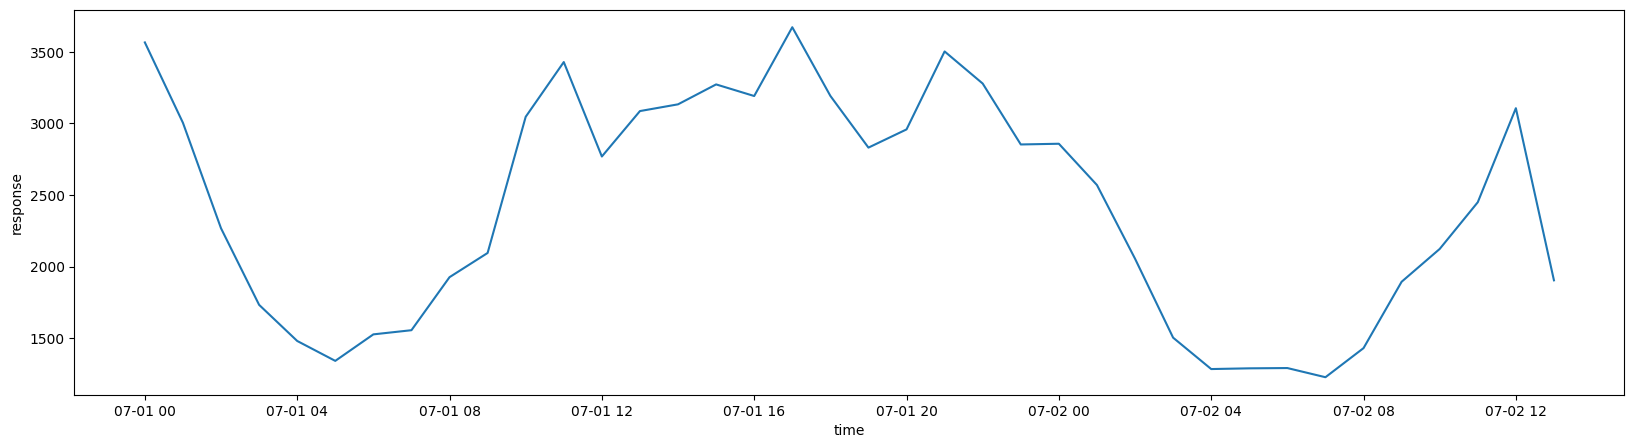

In [ ]:
axes, fig = plt.subplots(figsize = (20,5))
sns.lineplot(data = df2, x= 'time', y = 'response')


From the Above line graph between hour of the day and number of requests, it can be seen that minimum requests received are between 4 to 8 hrs and peak requests hours are between 10 hrs to 12 hrs and 16 hrs to 18 hrs

In [ ]:
df1.reset_index()
df1

,host,response,size,request_type,url
time,,,,,
1995-07-01 00:00:01,199.72.81.55,200,6245,GET,/history/apollo/ HTTP/1.0
1995-07-01 00:00:06,unicomp6.unicomp.net,200,3985,GET,/shuttle/countdown/ HTTP/1.0
1995-07-01 00:00:09,199.120.110.21,200,4085,GET,/shuttle/missions/sts-73/mission-sts-73.html H...
1995-07-01 00:00:11,burger.letters.com,304,0,GET,/shuttle/countdown/liftoff.html HTTP/1.0
1995-07-01 00:00:11,199.120.110.21,200,4179,GET,/shuttle/missions/sts-73/sts-73-patch-small.gi...
...,...,...,...,...,...
1995-07-02 13:40:05,ix-tam3-07.ix.netcom.com,200,509,GET,/icons/blank.xbm HTTP/1.0
1995-07-02 13:40:06,csd1-9.infolink.net,200,1293,GET,/procurement/business/kscbus.htm HTTP/1.0
1995-07-02 13:40:07,port49.iprolink.ch,200,6136,GET,/shuttle/missions/sts-71/sts-71-day-06-highlig...


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 91714 entries, 1995-07-01 00:00:01 to 1995-07-02 13:40:07
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   host          91714 non-null  object
 1   response      91714 non-null  int64 
 2   size          91714 non-null  object
 3   request_type  91714 non-null  object
 4   url           91714 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.2+ MB


In [ ]:
df1.reset_index(inplace = True)
df1

,time,host,response,size,request_type,url
0,1995-07-01 00:00:01,199.72.81.55,200,6245,GET,/history/apollo/ HTTP/1.0
1,1995-07-01 00:00:06,unicomp6.unicomp.net,200,3985,GET,/shuttle/countdown/ HTTP/1.0
2,1995-07-01 00:00:09,199.120.110.21,200,4085,GET,/shuttle/missions/sts-73/mission-sts-73.html H...
3,1995-07-01 00:00:11,burger.letters.com,304,0,GET,/shuttle/countdown/liftoff.html HTTP/1.0
4,1995-07-01 00:00:11,199.120.110.21,200,4179,GET,/shuttle/missions/sts-73/sts-73-patch-small.gi...
...,...,...,...,...,...,...
91709,1995-07-02 13:40:05,ix-tam3-07.ix.netcom.com,200,509,GET,/icons/blank.xbm HTTP/1.0
91710,1995-07-02 13:40:06,csd1-9.infolink.net,200,1293,GET,/procurement/business/kscbus.htm HTTP/1.0
91711,1995-07-02 13:40:07,port49.iprolink.ch,200,6136,GET,/shuttle/missions/sts-71/sts-71-day-06-highlig...
91712,1995-07-02 13:40:07,che2.llnl.gov,200,1313,GET,/shuttle/missions/sts-7/images/ HTTP/1.0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91714 entries, 0 to 91713
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   time          91714 non-null  datetime64[ns]
 1   host          91714 non-null  object        
 2   response      91714 non-null  int64         
 3   size          91714 non-null  object        
 4   request_type  91714 non-null  object        
 5   url           91714 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 4.2+ MB


In [ ]:
df1['hour'] = df1['time'].dt.hour

In [ ]:
df1.tail(30)

,time,host,response,size,request_type,url,hour
91684,1995-07-02 13:39:17,windsurf.ucdavis.edu,200,4538,GET,/shuttle/countdown/liftoff.html HTTP/1.0,13
91685,1995-07-02 13:39:18,131.89.78.20,200,1502,GET,/history/history.html HTTP/1.0,13
91686,1995-07-02 13:39:20,che2.llnl.gov,200,1596,GET,/shuttle/missions/sts-78/ HTTP/1.0,13
91687,1995-07-02 13:39:21,windsurf.ucdavis.edu,200,76576,GET,/shuttle/countdown/video/livevideo.gif HTTP/1.0,13
91688,1995-07-02 13:39:21,garfield.us.dell.com,200,30995,GET,/shuttle/missions/sts-71/images/KSC-95EC-0917....,13
91689,1995-07-02 13:39:24,131.89.78.20,200,9630,GET,/history/apollo/images/apollo-small.gif HTTP/1.0,13
91690,1995-07-02 13:39:24,ppp175.iadfw.net,200,5086,GET,/history/apollo/flight-summary.txt HTTP/1.0,13
91691,1995-07-02 13:39:24,ramsay.ann-arbor.mi.us,200,43655,GET,/shuttle/countdown/video/livevideo.jpeg HTTP/1.0,13
91692,1995-07-02 13:39:25,131.89.78.20,200,1204,GET,/images/KSC-logosmall.gif HTTP/1.0,13
91693,1995-07-02 13:39:25,131.89.78.20,200,786,GET,/images/NASA-logosmall.gif HTTP/1.0,13


In [ ]:
df1.request_type.unique()

array(['GET', 'HEAD', 'POST'], dtype=object)

In [ ]:
df1['day'] = df1['time'].dt.day
df1

,time,host,response,size,request_type,url,hour,day
0,1995-07-01 00:00:01,199.72.81.55,200,6245,GET,/history/apollo/ HTTP/1.0,0,1
1,1995-07-01 00:00:06,unicomp6.unicomp.net,200,3985,GET,/shuttle/countdown/ HTTP/1.0,0,1
2,1995-07-01 00:00:09,199.120.110.21,200,4085,GET,/shuttle/missions/sts-73/mission-sts-73.html H...,0,1
3,1995-07-01 00:00:11,burger.letters.com,304,0,GET,/shuttle/countdown/liftoff.html HTTP/1.0,0,1
4,1995-07-01 00:00:11,199.120.110.21,200,4179,GET,/shuttle/missions/sts-73/sts-73-patch-small.gi...,0,1
...,...,...,...,...,...,...,...,...
91709,1995-07-02 13:40:05,ix-tam3-07.ix.netcom.com,200,509,GET,/icons/blank.xbm HTTP/1.0,13,2
91710,1995-07-02 13:40:06,csd1-9.infolink.net,200,1293,GET,/procurement/business/kscbus.htm HTTP/1.0,13,2
91711,1995-07-02 13:40:07,port49.iprolink.ch,200,6136,GET,/shuttle/missions/sts-71/sts-71-day-06-highlig...,13,2
91712,1995-07-02 13:40:07,che2.llnl.gov,200,1313,GET,/shuttle/missions/sts-7/images/ HTTP/1.0,13,2


In [ ]:
df1[(df1.request_type == 'GET')].groupby(['day','hour']).count()


time  host  response  size  request_type   url
day hour                                                
1   0     3563  3563      3563  3563          3563  3563
    1     3002  3002      3002  3002          3002  3002
    2     2259  2259      2259  2259          2259  2259
    3     1729  1729      1729  1729          1729  1729
    4     1482  1482      1482  1482          1482  1482
    5     1342  1342      1342  1342          1342  1342
    6     1523  1523      1523  1523          1523  1523
    7     1557  1557      1557  1557          1557  1557
    8     1925  1925      1925  1925          1925  1925
    9     2091  2091      2091  2091          2091  2091
    10    3044  3044      3044  3044          3044  3044
    11    3425  3425      3425  3425          3425  3425
    12    2769  2769      2769  2769          2769  2769
    13    3086  3086      3086  3086          3086  3086
    14    3130  3130      3130  3130          3130  3130
    15    3272  3272      3272  3272          3272  3272
    16    3189  3189      3189  3189          3189  3189
    17    3667  3667      3667  3667          3667  3667
    18    3192  3192      3192  3192          3192  3192
    19    2831  2831      2831  2831          2831  2831
    20    2957  2957      2957  2957          2957  2957
    21    3502  3502      3502  3502          3502  3502
    22    3277  3277      3277  3277          3277  3277
    23    2853  2853      2853  2853          2853  2853
2   0     2857  2857      2857  2857          2857  2857
    1     2568  2568      2568  2568          2568  2568
    2     2056  2056      2056  2056          2056  2056
    3     1502  1502      1502  1502          1502  1502
    4     1281  1281      1281  1281          1281  1281
    5     1288  1288      1288  1288          1288  1288
    6     1288  1288      1288  1288          1288  1288
    7     1229  1229      1229  1229          1229  1229
    8     1430  1430      1430  1430          1430  1430
    9     1888  1888      1888  1888          1888  1888
    10    2124  2124      2124  2124          2124  2124
    11    2450  2450      2450  2450          2450  2450
    12    3106  3106      3106  3106          3106  3106
    13    1905  1905      1905  1905          1905  1905

In [ ]:
df3 = df1[(df1.request_type == 'HEAD')].groupby(['day','hour']).count()
df3

time  host  response  size  request_type  url
day hour                                               
1   0        1     1         1     1             1    1
    1        2     2         2     2             2    2
    2        9     9         9     9             9    9
    3        5     5         5     5             5    5
    5        1     1         1     1             1    1
    6        5     5         5     5             5    5
    8        2     2         2     2             2    2
    9        5     5         5     5             5    5
    10       2     2         2     2             2    2
    11       3     3         3     3             3    3
    14       3     3         3     3             3    3
    16       2     2         2     2             2    2
    17       4     4         4     4             4    4
    20       1     1         1     1             1    1
    22       1     1         1     1             1    1
2   0        1     1         1     1             1    1
    1        2     2         2     2             2    2
    3        3     3         3     3             3    3
    4        5     5         5     5             5    5
    5        3     3         3     3             3    3
    6        5     5         5     5             5    5
    8        2     2         2     2             2    2
    9        7     7         7     7             7    7

<Axes: xlabel='hour', ylabel='request_type'>

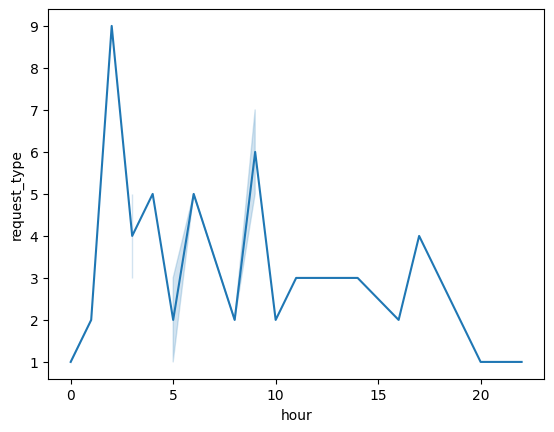

In [ ]:
sns.lineplot(data = df3, x = 'hour', y = 'request_type')

In [ ]:
df1[(df1.request_type == 'POST')].groupby(['day','hour']).count()

,,time,host,response,size,request_type,url
day,hour,,,,,,
1,0,1,1,1,1,1,1


In [ ]:
df1['size'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 91714 entries, 0 to 91713
Series name: size
Non-Null Count  Dtype 
--------------  ----- 
91714 non-null  object
dtypes: object(1)
memory usage: 716.6+ KB


In [ ]:
df1['size'][50]

'-'

In [ ]:
def clean_size(row):
  er = re.sub('[^0-9]+','0', row)
  return int(er)
df1['size'] = df1['size'].apply(clean_size)
df1['size'][50]

0

In [ ]:
df1['size'] = pd.to_numeric(df1['size'])

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91714 entries, 0 to 91713
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   time          91714 non-null  datetime64[ns]
 1   host          91714 non-null  object        
 2   response      91714 non-null  int64         
 3   size          91714 non-null  int64         
 4   request_type  91714 non-null  object        
 5   url           91714 non-null  object        
 6   hour          91714 non-null  int32         
 7   day           91714 non-null  int32         
dtypes: datetime64[ns](1), int32(2), int64(2), object(3)
memory usage: 4.9+ MB


In [65]:
df1['size_bins'] = pd.cut(df1['size'], bins = 10)

df1

,time,host,response,size,request_type,url,hour,day,size_bins
0,1995-07-01 00:00:01,199.72.81.55,200,6245,GET,/history/apollo/ HTTP/1.0,0,1,"(-1646.592, 164659.2]"
1,1995-07-01 00:00:06,unicomp6.unicomp.net,200,3985,GET,/shuttle/countdown/ HTTP/1.0,0,1,"(-1646.592, 164659.2]"
2,1995-07-01 00:00:09,199.120.110.21,200,4085,GET,/shuttle/missions/sts-73/mission-sts-73.html H...,0,1,"(-1646.592, 164659.2]"
3,1995-07-01 00:00:11,burger.letters.com,304,0,GET,/shuttle/countdown/liftoff.html HTTP/1.0,0,1,"(-1646.592, 164659.2]"
4,1995-07-01 00:00:11,199.120.110.21,200,4179,GET,/shuttle/missions/sts-73/sts-73-patch-small.gi...,0,1,"(-1646.592, 164659.2]"
...,...,...,...,...,...,...,...,...,...
91709,1995-07-02 13:40:05,ix-tam3-07.ix.netcom.com,200,509,GET,/icons/blank.xbm HTTP/1.0,13,2,"(-1646.592, 164659.2]"
91710,1995-07-02 13:40:06,csd1-9.infolink.net,200,1293,GET,/procurement/business/kscbus.htm HTTP/1.0,13,2,"(-1646.592, 164659.2]"
91711,1995-07-02 13:40:07,port49.iprolink.ch,200,6136,GET,/shuttle/missions/sts-71/sts-71-day-06-highlig...,13,2,"(-1646.592, 164659.2]"
91712,1995-07-02 13:40:07,che2.llnl.gov,200,1313,GET,/shuttle/missions/sts-7/images/ HTTP/1.0,13,2,"(-1646.592, 164659.2]"


In [72]:
df4= df1.groupby(['size_bins']).agg({'response': 'count'})
df4

,response
size_bins,
"(-1646.592, 164659.2]",89480
"(164659.2, 329318.4]",1283
"(329318.4, 493977.6]",147
"(493977.6, 658636.8]",205
"(658636.8, 823296.0]",17
"(823296.0, 987955.2]",373
"(987955.2, 1152614.4]",173
"(1152614.4, 1317273.6]",34
"(1317273.6, 1481932.8]",0


Most of the requests had size in the size bin of -1646.5 to 164659.2

In [120]:
def file_type(row):
  end = re.findall('\\.(jpg|jpeg|gif|html|HTML)', row)
  if (end == ['gif']) or (end == ['jpg']) or (end == ['jpeg']):
    return 'image'
  elif (end == ['html']) or (end == ['HTML']):
    return 'html'
  else:
    return 'other'

df1['file_type'] = df1['url'].apply(file_type)
df1


,time,host,response,size,request_type,url,hour,day,size_bins,file_type
0,1995-07-01 00:00:01,199.72.81.55,200,6245,GET,/history/apollo/ HTTP/1.0,0,1,"(-1646.592, 164659.2]",other
1,1995-07-01 00:00:06,unicomp6.unicomp.net,200,3985,GET,/shuttle/countdown/ HTTP/1.0,0,1,"(-1646.592, 164659.2]",other
2,1995-07-01 00:00:09,199.120.110.21,200,4085,GET,/shuttle/missions/sts-73/mission-sts-73.html H...,0,1,"(-1646.592, 164659.2]",html
3,1995-07-01 00:00:11,burger.letters.com,304,0,GET,/shuttle/countdown/liftoff.html HTTP/1.0,0,1,"(-1646.592, 164659.2]",html
4,1995-07-01 00:00:11,199.120.110.21,200,4179,GET,/shuttle/missions/sts-73/sts-73-patch-small.gi...,0,1,"(-1646.592, 164659.2]",image
...,...,...,...,...,...,...,...,...,...,...
91709,1995-07-02 13:40:05,ix-tam3-07.ix.netcom.com,200,509,GET,/icons/blank.xbm HTTP/1.0,13,2,"(-1646.592, 164659.2]",other
91710,1995-07-02 13:40:06,csd1-9.infolink.net,200,1293,GET,/procurement/business/kscbus.htm HTTP/1.0,13,2,"(-1646.592, 164659.2]",other
91711,1995-07-02 13:40:07,port49.iprolink.ch,200,6136,GET,/shuttle/missions/sts-71/sts-71-day-06-highlig...,13,2,"(-1646.592, 164659.2]",html
91712,1995-07-02 13:40:07,che2.llnl.gov,200,1313,GET,/shuttle/missions/sts-7/images/ HTTP/1.0,13,2,"(-1646.592, 164659.2]",other


In [121]:
df1[(df1.file_type == 'image')].count()

time            50160
host            50160
response        50160
size            50160
request_type    50160
url             50160
hour            50160
day             50160
size_bins       50160
file_type       50160
dtype: int64

Images were rendered 50,160 times in the given time period of study


In [122]:
df1[(df1.file_type == 'html')].count()

time            20247
host            20247
response        20247
size            20247
request_type    20247
url             20247
hour            20247
day             20247
size_bins       20247
file_type       20247
dtype: int64